Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [23]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [24]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

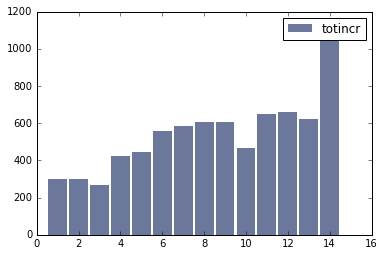

In [25]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

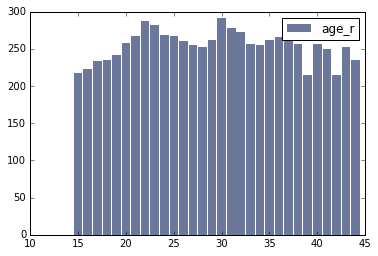

In [26]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

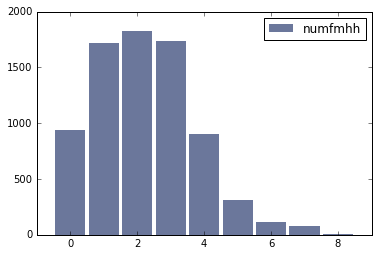

In [27]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh')
thinkplot.Show()

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

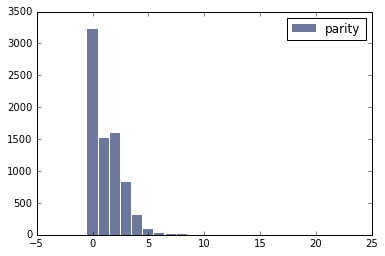

In [28]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Show()

In [29]:
print 'The majority of respondents have had no children. After that, the general is between 1-5, with a very few between 6-10'

The majority of respondents have had no children. After that, the general is between 1-5, with a very few between 6-10


Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [30]:
for num, res in hist.Largest(10):
    print num, res

22 1
16 1
10 3
9 2
8 8
7 15
6 29
5 95
4 309
3 828


Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

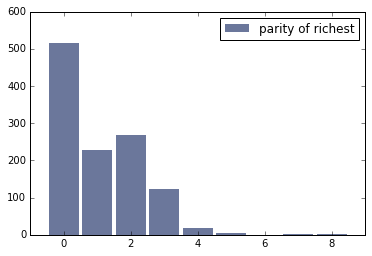

In [31]:
highest = resp[resp.totincr == 14]
hist = thinkstats2.Hist(highest.parity)
thinkplot.Hist(hist, label='parity of richest')
thinkplot.Show()

Find the largest parities for high income respondents.

In [32]:
for num, res in hist.Largest(10):
    print num, res

8 1
7 1
5 5
4 19
3 123
2 267
1 229
0 515


Compare the mean <tt>parity</tt> for high income respondents and others.

In [33]:
others = resp[resp.totincr != 14]
print 'highest: ', highest.parity.mean()
print 'others: ', others.parity.mean()

highest:  1.07586206897
others:  1.24957581367


Investigate any other variables that look interesting.

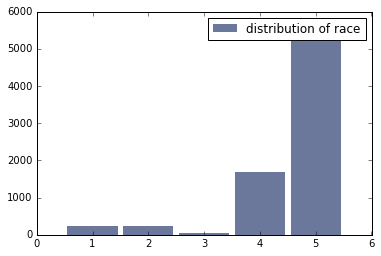

In [34]:
hist = thinkstats2.Hist(resp.rscreenrace)
thinkplot.Hist(hist, label='distribution of race')
thinkplot.Show()

In [35]:
print '.: inapplicable, 1-3: other race groups, 4: black or african american, 5: white'

.: inapplicable, 1-3: other race groups, 4: black or african american, 5: white


### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

In [36]:
import nsfg
import math 

df = nsfg.ReadFemPreg()
first = df[df.birthord == 1]
others = df[df.birthord != 1]

def CohenEffectSize(first, others):
    diff = first.mean() - others.mean()
    
    var1 = first.var()
    var2 = others.var()
    n1, n2 = len(first), len(others)
    
    pooled_var = (n1*var1 + n2*var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    
    return math.fabs(d)

CohenEffectSize(first.totalwgt_lb, others.totalwgt_lb)

0.08893641177719079

In [37]:
##From this it appears that first children tend to weigh less than others. 

In [38]:
CohenEffectSize(first.prglngth, others.prglngth)

1.0930083433621403

In [39]:
##From this it seems that first children tend to be born before other children, although the numbers seem pretty close to each other. 